In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import pandas as pd

# Loading the pairs for Sketch2Code

In [3]:
pairs = pd.read_csv("/kaggle/input/sketch2webpage-pairs-csv/Sketch2Webpage.csv")

In [4]:
pairs.head()

,Unnamed: 0,sketches,originals
0,0,9335_0.png,9335.png
1,1,5257_0.png,5257.png
2,2,3747_0.png,3747.png
3,3,9719_0.png,9719.png
4,4,512_2.png,512.png


# Converts the original .png images into .jpeg format

In [28]:
src_dir = "/kaggle/input/sketch2code-dataset-v1-cleaned/sketch2code_dataset_v1_cleaned"
dst_dir = "/kaggle/working/dataset_sketch2webpage"

os.makedirs(dst_dir, exist_ok=True)

valid_exts = (".png", ".jpg", ".jpeg")

for fname in os.listdir(src_dir):
    if not fname.lower().endswith(valid_exts):
        continue

    src_path = os.path.join(src_dir, fname)

    # Force .jpeg extension
    base_name = os.path.splitext(fname)[0]
    dst_fname = base_name + ".jpg"
    dst_path = os.path.join(dst_dir, dst_fname)

    try:
        img = Image.open(src_path).convert("RGB")  # removes alpha if PNG
        img.save(dst_path, "JPEG", quality=95)

        print(f"Saved: {dst_fname}")

    except Exception as e:
        print(f"Failed: {fname} | {e}")

Saved: 8654_0.jpg
Saved: 13412.jpg
Saved: 60_2.jpg
Saved: 7530.jpg
Saved: 17394.jpg
Saved: 298_0.jpg
Saved: 17743_1.jpg
Saved: 13776_0.jpg
Saved: 10942_0.jpg
Saved: 927_0.jpg
Saved: 16790_0.jpg
Saved: 12980_0.jpg
Saved: 16790.jpg
Saved: 1332_0.jpg
Saved: 309_1.jpg
Saved: 6440_2.jpg
Saved: 4428_0.jpg
Saved: 87_0.jpg
Saved: 4986_0.jpg
Saved: 15954.jpg
Saved: 15385_0.jpg
Saved: 340.jpg
Saved: 4518.jpg
Saved: 2976.jpg
Saved: 8150_0.jpg
Saved: 1037.jpg
Saved: 4518_0.jpg
Saved: 8639.jpg
Saved: 15915_1.jpg
Saved: 8995_0.jpg
Saved: 3747_1.jpg
Saved: 4097_0.jpg
Saved: 17636.jpg
Saved: 17739_0.jpg
Saved: 12192_1.jpg
Saved: 12508.jpg
Saved: 9031.jpg
Saved: 10920.jpg
Saved: 10303_0.jpg
Saved: 12805_1.jpg
Saved: 10942.jpg
Saved: 2138_0.jpg
Saved: 8915_0.jpg
Saved: 4211_0.jpg
Saved: 7331.jpg
Saved: 15487.jpg
Saved: 12805_0.jpg
Saved: 927.jpg
Saved: 340_1.jpg
Saved: 348.jpg
Saved: 11306_0.jpg
Saved: 14731_0.jpg
Saved: 11825_1.jpg
Saved: 11489_0.jpg
Saved: 13547.jpg
Saved: 370_2.jpg
Saved: 14781_0.jpg

In [ ]:
rgb_img = Image.open("/kaggle/working/dataset_sketch2webpage/1002_0.jpg")

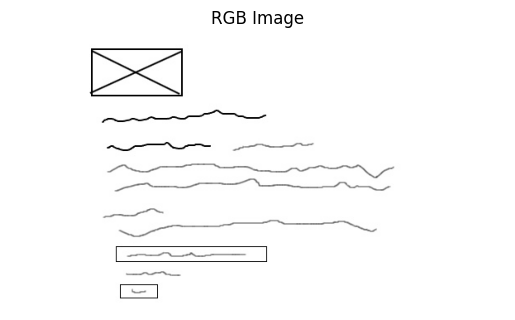

In [33]:
plt.imshow(rgb_img)
plt.axis("off")
plt.title("RGB Image")
plt.show()

In [ ]:
import os
from datasets import Dataset, Features, Image as HFImage, Value

thermal_dir = "/kaggle/working/dataset_sketch2webpage"
rgb_dir = "/kaggle/working/dataset_sketch2webpage"

In [ ]:
def gen():
    # for idx, fname in enumerate(names):
    for idx, row in pairs.iterrows():
        # print(row)
        thermal_path = os.path.join(thermal_dir, row['sketches']).replace(".png", ".jpeg")
        rgb_path = os.path.join(rgb_dir, row['originals']).replace(".png", ".jpg")
        
        yield {
            "conditioning_image": thermal_path,
            "image": rgb_path,
            "prompt": "",
        }

features = Features({
    "conditioning_image": HFImage(),
    "image": HFImage(),
    "prompt": Value("string"),
})

dataset = Dataset.from_generator(gen, features=features)

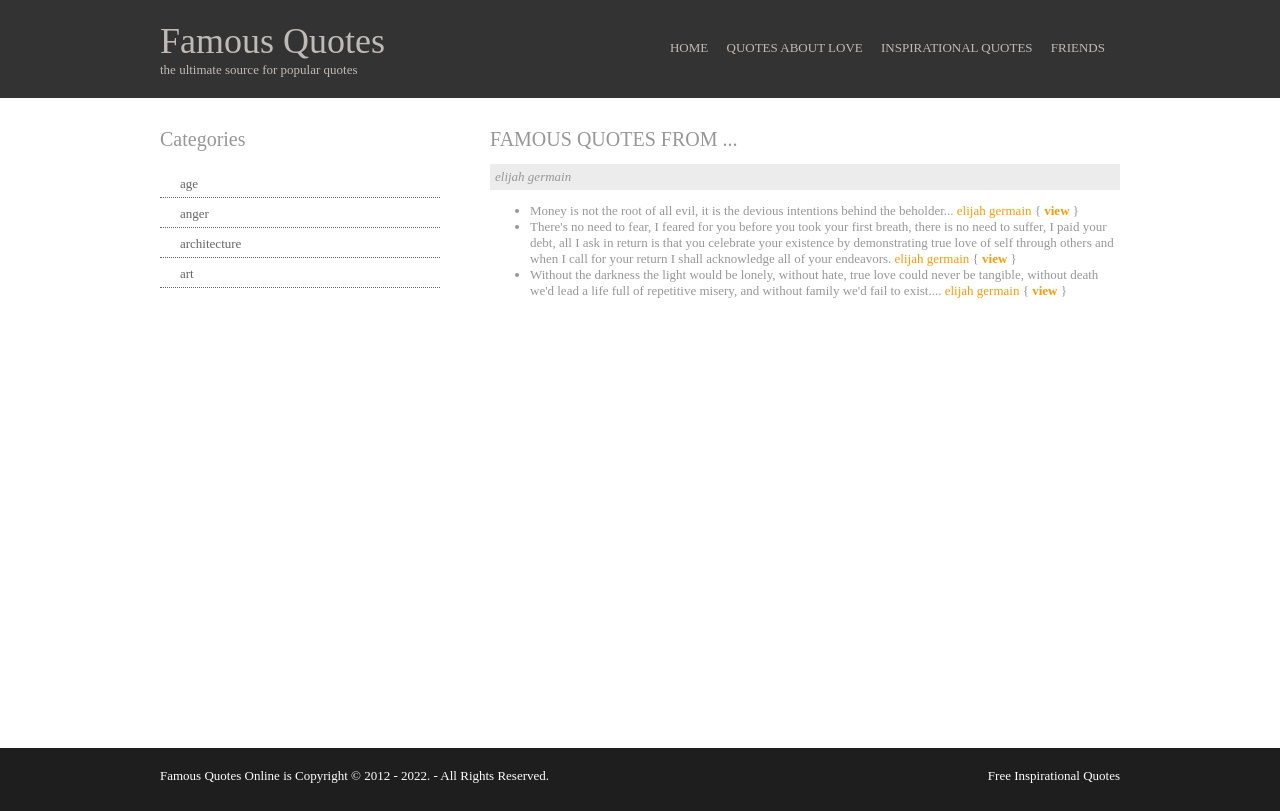

In [36]:
dataset[0]['image']

In [1]:
paths = [
    "dataset_sketch2webpage/10018_0.jpeg",
    "dataset_sketch2webpage/1002_0.jpeg"
]

for p in paths:
    img = Image.open(p).convert("RGB")
    img = img.resize((384, 384), Image.BILINEAR)
    img.save(p)

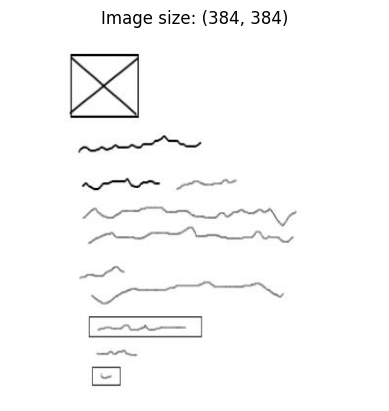

In [58]:
img = Image.open("dataset_sketch2webpage/1002_0.jpeg")

plt.imshow(img)
plt.axis("off")
plt.title(f"Image size: {img.size}")
plt.show()